# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: Justin Schroder

#### Github Link: [SchroderJ-pixel](https://github.com/SchroderJ-pixel)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

---

### Task 0 
0. Imports

In [88]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import json and pickle (included in the Python Standard Library).

import json
import pickle

import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')
!pip list

All prereqs installed.
Package                 Version
----------------------- -----------
annotated-types         0.7.0
asttokens               3.0.0
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.7.9
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
colorama                0.4.6
comm                    0.2.2
confection              0.1.5
contourpy               1.3.2
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.14
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.58.5
idna                    3.10
ipykernel               6.29.5
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
langcodes               3.5.0

---

## Task 1

1. The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

In [89]:
result = json.loads(requests.get('https://api.lyrics.ovh/v1/They Might Be Giants/Birdhouse in your soul').text)

with open("lyrics.json", "w") as file:
    json.dump(result, file, indent=4)

---

## Task 2

2. Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

In [90]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

with open("lyrics.json", "r") as file:
    data = json.load(file)

lyrics = data["lyrics"]
print("Lyrics:\n", lyrics)

doc = nlp(lyrics)
polarity = doc._.polarity
print("\nPolarity Score:", polarity)

Lyrics:
 I'm your only friend 
I'm not your only friend 
But I'm a little glowing friend 
But really I'm not actually your friend 
But I am 


Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I have a secret to tell 

From my electrical well 

It's a simple message and I'm leaving out the whistles and bells 

So the room must listen to me 

Filibuster vigilantly 

My name is blue canary one note* spelled l-i-t-e 

My story's infinite 

Like the Longines Symphonette it doesn't rest 



Blue canary in the outlet by the light switch 

Who watches over you 

Make a little birdhouse in your soul 

Not to put too fine a point on it 

Say I'm the only bee in your bonnet 

Make a little birdhouse in your soul 



I'm your only friend 

I'm not your only friend 

But I'm a little glowing friend 

But really I'm not actual

---

## Task 3

3. Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [91]:
import requests
import json

def get_lyrics_and_save(artist, song, filename):
    url = f"https://api.lyrics.ovh/v1/{artist}/{song}"
    response = requests.get(url)

    if response.status_code == 200:
        result = response.json()
        with open(filename, "w") as file:
            json.dump(result, file, indent=4)
        print(f"Lyrics saved to {filename}")
    else:
        print(f"Failed to fetch lyrics for {song} by {artist}")


get_lyrics_and_save("Surfaces", "Wave of You", "surfaces_wave_of_you.json")
get_lyrics_and_save("Benson Boone", "Mystical Magical", "benson_boone_mystical_magical.json")
get_lyrics_and_save("Alex Warren", "Ordinary", "alex_warren_ordinary.json")
get_lyrics_and_save("Imagine Dragons", "Demons", "imagine_dragons_demons.json")

Lyrics saved to surfaces_wave_of_you.json
Lyrics saved to benson_boone_mystical_magical.json
Lyrics saved to alex_warren_ordinary.json
Lyrics saved to imagine_dragons_demons.json


---

## Task 4

4. Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the three files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

In [92]:
nlp = spacy.load("en_core_web_sm")

if not Doc.has_extension("polarity"):
    Doc.set_extension("polarity", getter=lambda doc: TextBlob(doc.text).sentiment.polarity)

def analyze_lyrics_sentiment(filename):
    with open(filename, "r") as file:
        data = json.load(file)
    
    lyrics = data.get("lyrics", "")
    doc = nlp(lyrics)
    return doc._.polarity

songs = {
    "Surfaces – Wave of You": "surfaces_wave_of_you.json",
    "Benson Boone – Mystical Magical": "benson_boone_mystical_magical.json",
    "Alex Warren – Ordinary": "alex_warren_ordinary.json",
    "Imagine Dragons – Demons": "imagine_dragons_demons.json"
}

for title, file in songs.items():
    polarity = analyze_lyrics_sentiment(file)
    print(f"{title}: Polarity Score = {polarity:.3f}")


Surfaces – Wave of You: Polarity Score = -0.140
Benson Boone – Mystical Magical: Polarity Score = 0.245
Alex Warren – Ordinary: Polarity Score = -0.148
Imagine Dragons – Demons: Polarity Score = -0.190


---

## Bonus Task
Graphed the Polarity Scores 

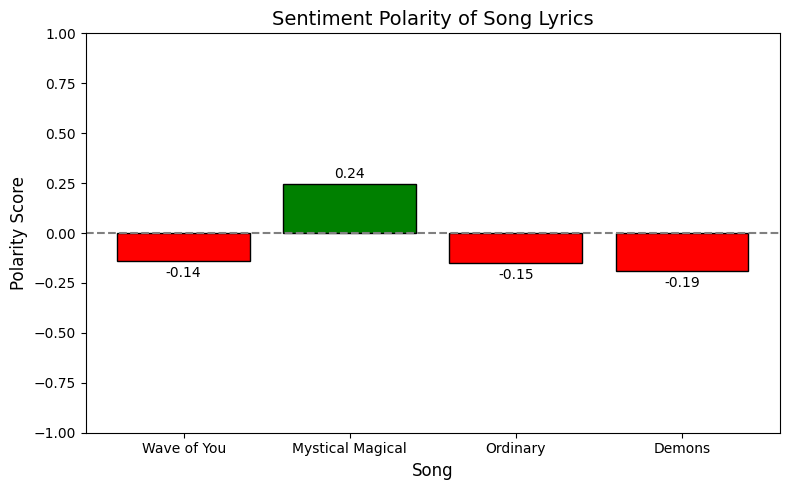

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Song titles
song_titles = [
    "Wave of You",
    "Mystical Magical",
    "Ordinary",
    "Demons"
]

# Corresponding files
filenames = [
    "surfaces_wave_of_you.json",
    "benson_boone_mystical_magical.json",
    "alex_warren_ordinary.json",
    "imagine_dragons_demons.json"
]

# Get polarity scores
polarity_scores = [analyze_lyrics_sentiment(file) for file in filenames]

# Colors
colors = ['red' if score < 0 else 'green' for score in polarity_scores]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(song_titles, polarity_scores, color=colors, edgecolor='black')

# Labels and formatting
plt.title("Sentiment Polarity of Song Lyrics", fontsize=14)
plt.ylabel("Polarity Score", fontsize=12)
plt.xlabel("Song", fontsize=12)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')

# Value labels to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.03 if height >= 0 else height - 0.08,
             f"{height:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

